In [6]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import wcs
import pickle
import cat_utils
from scipy.optimize import curve_fit

In [7]:
labels = '02a57694o0299I 02a57694o0303I 02a57694o0307I 02a57694o0319I 02a57694o0323I 02a57694o0327I 02a57694o0339I 02a57694o0343I 02a57694o0347I'.split()
analysis_name = '_'.join([l.split('o')[1] for l in labels])
print(analysis_name)

run = 'ATLAS_mwa57694_rereduction'
xcor_data_dir = '/home/abrahamn/xcor_data/'
raw_frames_root = xcor_data_dir+run+'/'
analysis_root = xcor_data_dir+'analysis/'+run+'/' + analysis_name + '/'

0299I_0303I_0307I_0319I_0323I_0327I_0339I_0343I_0347I


In [16]:
# secat = pickle.load( open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/whole_field_secat.p', "rb" ) )
# g = secat.jy>1.e-10
# secat = cat_utils.Catalog(secat.ra[g],secat.dec[g],secat.jy[g])

srcdat = np.genfromtxt(raw_frames_root+labels[0]+'.dph')
dphcat = cat_utils.Catalog(srcdat[:,0],srcdat[:,1],3631*10.**(-srcdat[:,2]/2.5))

secat = cat_utils.IRCatalog(se_path=analysis_root+analysis_name+'.sex',se_magzpt=20.46)
g = secat.jy_all>1.e-10
secat = cat_utils.Catalog(secat.ra_all[g],secat.dec_all[g],secat.jy_all[g])

loading/home/abrahamn/xcor_data/analysis/ATLAS_mwa57694_rereduction/0299I_0303I_0307I_0319I_0323I_0327I_0339I_0343I_0347I/0299I_0303I_0307I_0319I_0323I_0327I_0339I_0343I_0347I.sex


In [17]:
# plt.figure(figsize=(14,12))
# plt.scatter(secat.ra,secat.dec,secat.jy*5000,facecolors='red',edgecolors='none')
# plt.scatter(dphcat.ra,dphcat.dec,dphcat.jy*5000,facecolors='none')

# plt.xlim([-2,-1])
# plt.ylim([-31,-30])

In [18]:
img_fits_path = analysis_root+analysis_name+'.fits'

hdulist_img = fits.open(img_fits_path)
img = hdulist_img[0].data
h = hdulist_img[0].header
n = img.shape[0]
hdulist_img.close()

In [19]:
regfiletest = open(analysis_root+'regfiletest.reg','w')

regfiletest.write('# Region file format: DS9 version 4.1\n')
regfiletest.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n')
regfiletest.write('icrs\n')

radmin,radmax = 7.5,60
logjymin,logjymax = -5,0
def rad_asec_for_jy(jy):
    return jy*25+(radmax-radmin)/(logjymax-logjymin)*(np.log10(jy)-logjymin)+radmin
def rad_asec_for_jy_old(jy):
    radmax=40
    return jy*25+(radmax-radmin)/(logjymax-logjymin)*(np.log10(jy)-logjymin)+radmin
secat_rad = rad_asec_for_jy(secat.jy)

for i in range(len(secat.jy)):
    regfiletest.write("circle(%f,%f,%f\")\n"%(secat.ra[i],secat.dec[i],secat_rad[i]))
                                              

regfiletest.close()

In [20]:
# #hi = plt.hist(np.log10(secat.jy),np.linspace(-5,0),histtype='step',color='blue')
# # hi = plt.hist(np.log10(srcjy),np.linspace(-5,0),histtype='step',color='red')
# hi = plt.hist(np.log10(secat.jy),np.linspace(-5,2),histtype='step',color='cyan')
# plt.gca().set_yscale('log')

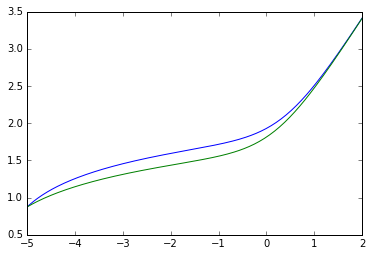

In [21]:
logjyvals = np.linspace(-5,2,200)
plt.plot(logjyvals,np.log10(rad_asec_for_jy(10.**logjyvals)))
plt.plot(logjyvals,np.log10(rad_asec_for_jy_old(10.**logjyvals)))

In [22]:
img_fits_path = analysis_root+analysis_name+'.fits'
hdulist_img = fits.open(img_fits_path)
img = hdulist_img[0].data
h = hdulist_img[0].header
n = img.shape[0]
hdulist_img.close()

w = wcs.WCS(h)
mask = np.ones(img.shape)
asec_per_pixel = np.abs(h['CD1_1'])*3600

In [23]:
def mask_circle_in_image(m,xcent,ycent,r):
    n=m.shape[0]
    if not ((0<=xcent<n) and (0<=ycent<n)): return
    for y in range(-int(r),int(r)+1): # x is the x distance from circle center
        if not (0 <= ycent+y < n): continue
        #print(n)
        #print(int(xcent-np.sqrt(r**2-y**2)),int(xcent+np.sqrt(r**2-y**2)))
        #rint(max(0,int(xcent-np.sqrt(r**2-y**2))),min(n,int(xcent+np.sqrt(r**2-y**2))),)
        m[ycent+y,max(0,int(xcent-np.sqrt(r**2-y**2))):min(n,int(xcent+np.sqrt(r**2-y**2)))] = 0


In [24]:
px,py = w.wcs_world2pix(secat.ra,secat.dec,1)

# draw a filled circle of zeros on the mask image for each source
for i in range(len(secat.ra)):
    if i % 2500 == 0: print(1.*i/len(secat.ra))
    mask_circle_in_image(mask,px[i],py[i],secat_rad[i]/asec_per_pixel)

0.0


/home/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.0490985506108
0.0981971012216
0.147295651832
0.196394202443
0.245492753054
0.294591303665
0.343689854276
0.392788404886
0.441886955497
0.490985506108
0.540084056719
0.589182607329
0.63828115794
0.687379708551
0.736478259162
0.785576809773
0.834675360383
0.883773910994
0.932872461605
0.981971012216


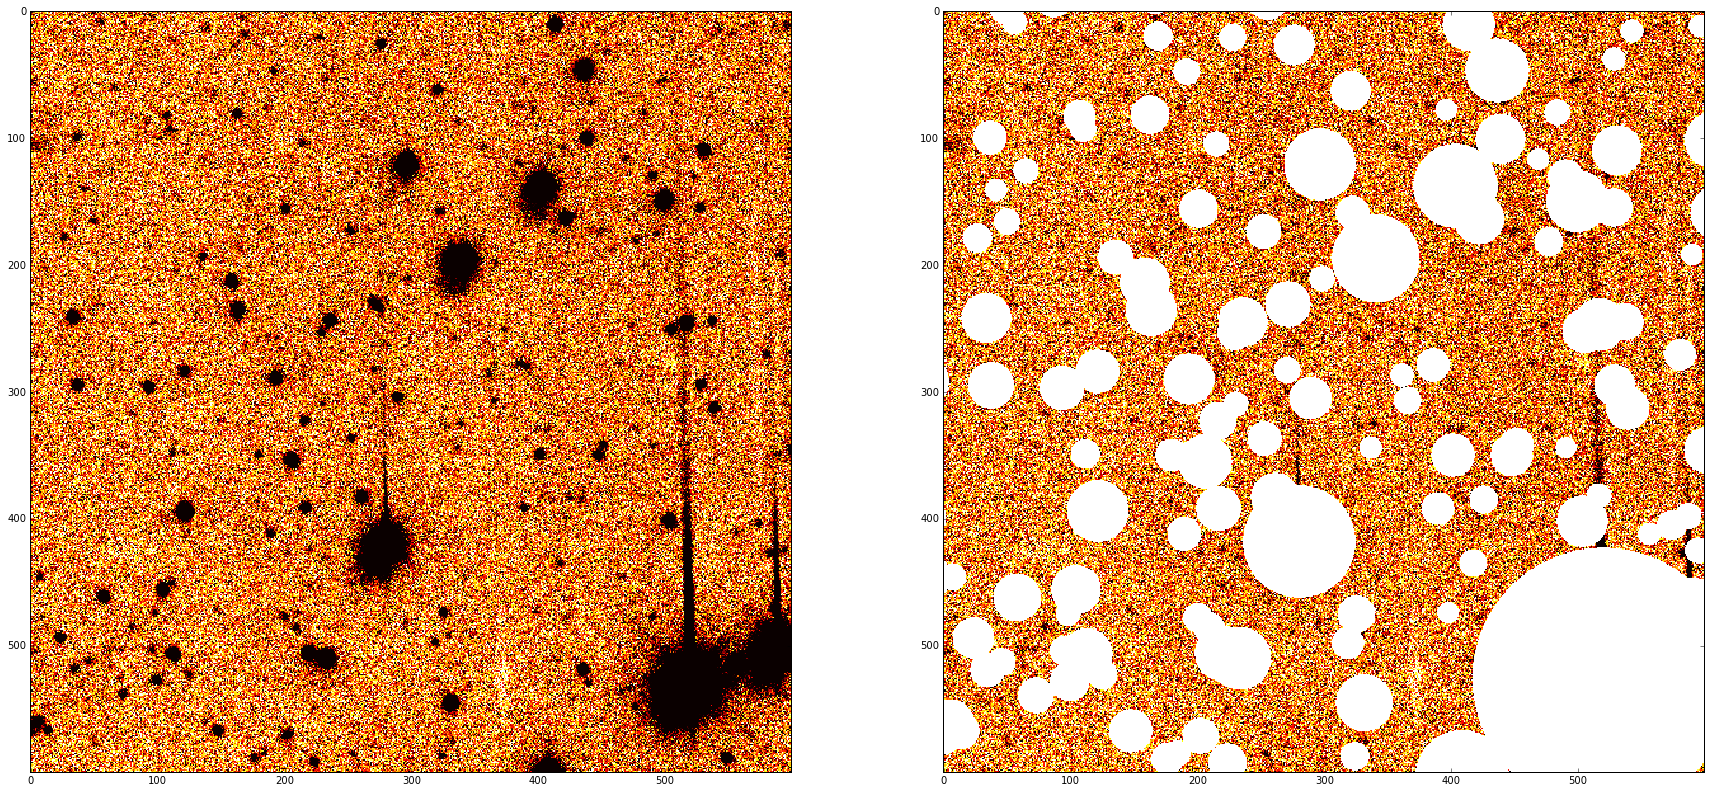

In [25]:
plt.figure(figsize=(30,15))

x0,x1 = 6400,7000
y0,y1 = 15200,15800
# x0,x1 = 2400,12000
# y0,y1 = 10400,22600
v0,v1 = 360,375
skip=1

plt.subplot(121)
plt.imshow(img[x0:x1:skip,y0:y1:skip],vmin=v0,vmax=v1,cmap='hot_r',interpolation='nearest')

plt.subplot(122)
plt.imshow(img[x0:x1:skip,y0:y1:skip]*mask[x0:x1:skip,y0:y1:skip],vmin=v0,vmax=v1,cmap='hot_r',interpolation='nearest')

In [26]:
target_coarse_res_asec = 3.*60
fine_pixel_asec = 1.86
coarse_bin_factor = int(np.round(target_coarse_res_asec/fine_pixel_asec))
print(coarse_bin_factor)

n_coarse = int(n/coarse_bin_factor)
n_fine_max = n_coarse*coarse_bin_factor

97


In [27]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [50]:
img_binned_avgunmasked = np.zeros((n_coarse,n_coarse))
img_binned_fitunmasked = np.zeros((n_coarse,n_coarse))
img_binned_counts = np.zeros((n_coarse,n_coarse))

binedges = np.linspace(300,500,300)
for i in range(n_coarse):
    print(1.*i/n_coarse)
    for j in range(n_coarse):
        img_in_this_coarse_bin = img[i*coarse_bin_factor:(i+1)*coarse_bin_factor,j*coarse_bin_factor:(j+1)*coarse_bin_factor]
        mask_in_this_coarse_bin = mask[i*coarse_bin_factor:(i+1)*coarse_bin_factor,j*coarse_bin_factor:(j+1)*coarse_bin_factor]
        if np.any(img_in_this_coarse_bin==0) or np.sum(mask_in_this_coarse_bin)<.65*coarse_bin_factor**2: continue
        
        img_binned_counts[i,j] = np.sum(mask_in_this_coarse_bin)
        img_binned_avgunmasked[i,j] = np.sum(img_in_this_coarse_bin*mask_in_this_coarse_bin)/np.sum(mask_in_this_coarse_bin)
                
        counts,binedges = np.histogram(img_in_this_coarse_bin[1==mask_in_this_coarse_bin].flatten(),binedges)
        bins = .5*(binedges[1:]+binedges[:-1])

        g = (bins<np.max(bins[np.where(counts>np.max(counts)*.5)[0]]))|(bins<bins[np.argmax(counts)])
        
        try:
            coeff, var_matrix = curve_fit(gauss, bins[g], counts[g], p0=[np.max(counts),np.median(img_in_this_coarse_bin[1==mask_in_this_coarse_bin]),10])
            img_binned_fitunmasked[i,j] = coeff[1]
        except:
            pass

0.0
0.00418410041841
0.00836820083682
0.0125523012552
0.0167364016736
0.0209205020921
0.0251046025105
0.0292887029289
0.0334728033473
0.0376569037657
0.0418410041841
0.0460251046025
0.0502092050209
0.0543933054393
0.0585774058577
0.0627615062762
0.0669456066946
0.071129707113
0.0753138075314
0.0794979079498
0.0836820083682
0.0878661087866
0.092050209205
0.0962343096234
0.100418410042
0.10460251046
0.108786610879
0.112970711297
0.117154811715
0.121338912134
0.125523012552
0.129707112971
0.133891213389
0.138075313808
0.142259414226
0.146443514644
0.150627615063
0.154811715481
0.1589958159
0.163179916318
0.167364016736
0.171548117155
0.175732217573
0.179916317992
0.18410041841
0.188284518828
0.192468619247
0.196652719665
0.200836820084
0.205020920502
0.209205020921
0.213389121339
0.217573221757
0.221757322176
0.225941422594
0.230125523013
0.234309623431
0.238493723849
0.242677824268
0.246861924686
0.251046025105
0.255230125523
0.259414225941
0.26359832636
0.267782426778
0.271966527197
0.2

/home/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide


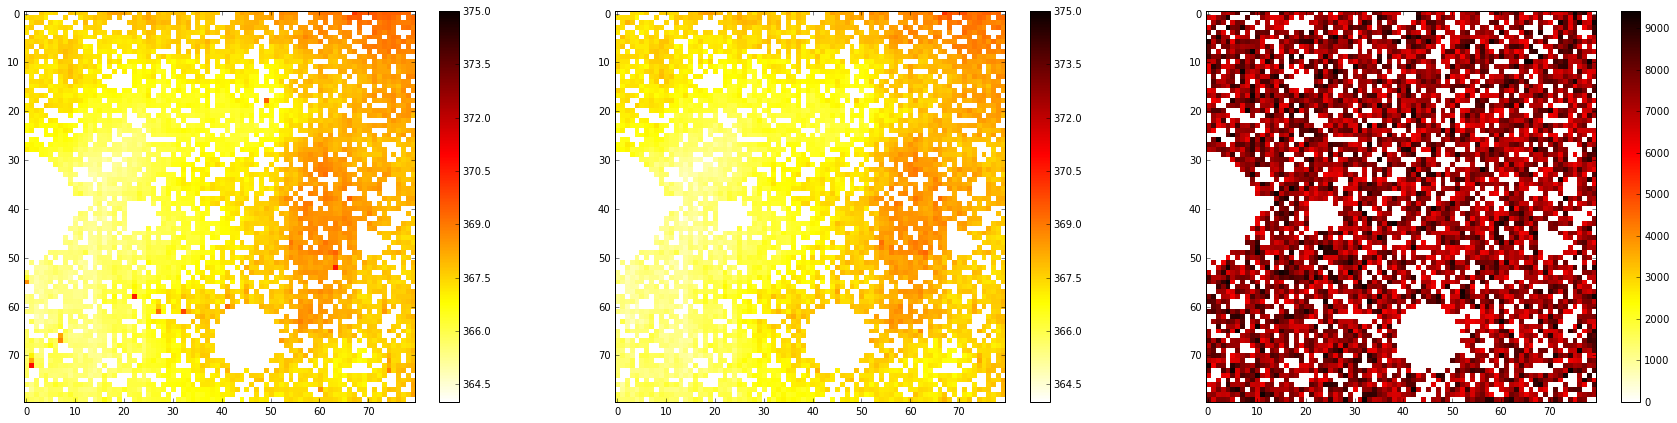

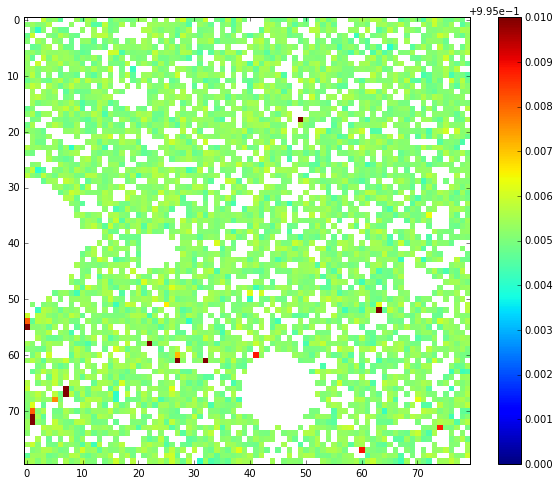

In [51]:
plt.figure(figsize=(30,7))

v0,v1 = 364,375
d = 80
x0 = 30
x1 = x0 + d
y0 = 123
y1 = y0 + d

plt.subplot(131)
plt.imshow(img_binned_avgunmasked[x0:x1,y0:y1],vmin=v0,vmax=v1,cmap='hot_r',interpolation='nearest')
plt.colorbar()

plt.subplot(132)
plt.imshow(img_binned_fitunmasked[x0:x1,y0:y1],vmin=v0,vmax=v1,cmap='hot_r',interpolation='nearest')
plt.colorbar()

plt.subplot(133)
plt.imshow(img_binned_counts[x0:x1,y0:y1],cmap='hot_r',interpolation='nearest')
plt.colorbar()

plt.figure(figsize=(10,8))

plt.imshow(img_binned_avgunmasked[x0:x1,y0:y1]/img_binned_fitunmasked[x0:x1,y0:y1],cmap='jet',interpolation='nearest',vmin=.995,vmax=1.005)
plt.colorbar()

In [56]:
i,j = 36,129
img_in_this_coarse_bin = img[i*coarse_bin_factor:(i+1)*coarse_bin_factor,j*coarse_bin_factor:(j+1)*coarse_bin_factor]
mask_in_this_coarse_bin = mask[i*coarse_bin_factor:(i+1)*coarse_bin_factor,j*coarse_bin_factor:(j+1)*coarse_bin_factor]

In [57]:
np.sum(mask_in_this_coarse_bin)/coarse_bin_factor**2

0.88022106493782548

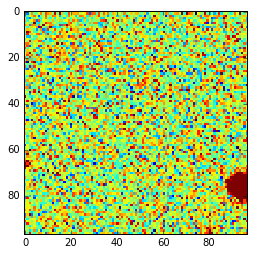

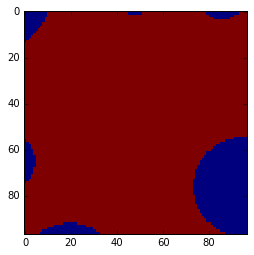

In [58]:
plt.imshow(img_in_this_coarse_bin,interpolation='nearest',vmin=350,vmax=380)
plt.figure()
plt.imshow(mask_in_this_coarse_bin,interpolation='nearest')

In [59]:
counts,binedges = np.histogram(img_in_this_coarse_bin[1==mask_in_this_coarse_bin].flatten(),binedges)
bins = .5*(binedges[1:]+binedges[:-1])

g = (bins<np.max(bins[np.where(counts>np.max(counts)*.35)[0]]))|(bins<bins[np.argmax(counts)])
coeff, var_matrix = curve_fit(gauss, bins[g], counts[g], p0=[np.max(counts),np.median(img_in_this_coarse_bin),10])

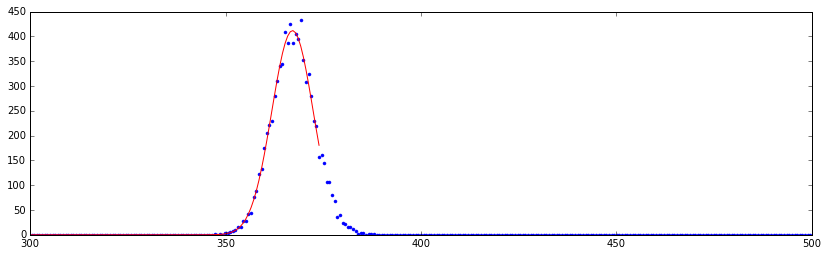

In [60]:
plt.figure(figsize=(14,4))
plt.plot(bins,counts,'b.')
plt.plot(bins[g],gauss(bins[g],coeff[0],coeff[1],coeff[2]),'r-')

In [61]:
# so now let's use the inverse variance weighted power spectrum estimator

